## <center>Categorical features</center>

Machine learning and deep learning models, like those in Keras, require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. The two most popular techniques are an integer encoding and a one hot encoding, although a newer technique called learned embedding may provide a useful middle ground between these two methods.


A categorical variable is a variable whose values take on the value of labels. For example, the variable may be “color” and may take on the values “red,” “green,” and “blue.” Sometimes, the categorical data may have an ordered relationship between the categories, such as “first,” “second,” and “third.” This type of categorical data is referred to as ordinal and the additional ordering information can be useful.

In this lecture we will review 2 types of encoding:

1. Integer Encoding - Ordinal encoding: used for order data, where each unique label is mapped to an integer.
2. One Hot Encoding: used for unordered/nomianl data, where each label is mapped to a binary vector.

### Example

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Preprocessing/Data Sets/sample.csv")
df

,shape,class,size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,M


In this case we can see that class and size *must* follow an order, while shape does not. That is why for the order instances OrdinalEncoder must be used.

In [3]:
oe = OrdinalEncoder(categories=[["first", "second", "third"], ["XS", "S", "M", "L", "XL"]])

oe.fit_transform(df[["class", "size"]])

array([[2., 1.],
       [0., 1.],
       [1., 3.],
       [2., 2.]])

In this case, it is interesting to notice, despite not having values for XS or XL they can be encoded for future evaluations, and the model can recognize them.

In [4]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[["shape"]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

Similar to OneHotEncoding, pandas has a feature called get_dummies

In [5]:
df1 = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Preprocessing/Data Sets/homeprices.csv')
df1

,town,area,price
0,monroe_township,2600,550000
1,monroe_township,3000,565000
2,monroe_township,3200,610000
3,monroe_township,3600,680000
4,monroe_township,4000,725000
5,west_windsor,2600,585000
6,west_windsor,2800,615000
7,west_windsor,3300,650000
8,west_windsor,3600,710000
9,robbinsville,2600,575000


In [6]:
# Find the categorical values (non numerical variables) and creating the dummy dataframe
cat_df1 = df1.select_dtypes(include='object')
dummy_df = pd.get_dummies(cat_df1.town, drop_first=True) #By dropping first, the model avoids to have certain colinearty
dummy_df

,robbinsville,west_windsor
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0


In [7]:
# Concatenating and removing the extra columns
df_final = pd.concat([df1, dummy_df], axis=1)
df_final.drop(columns=["town"], inplace=True)
print(df_final)

    area   price  robbinsville  west_windsor
0   2600  550000             0             0
1   3000  565000             0             0
2   3200  610000             0             0
3   3600  680000             0             0
4   4000  725000             0             0
5   2600  585000             0             1
6   2800  615000             0             1
7   3300  650000             0             1
8   3600  710000             0             1
9   2600  575000             1             0
10  2900  600000             1             0
11  3100  620000             1             0
12  3600  695000             1             0


In [8]:
# Example with an ML model

from sklearn.linear_model import LinearRegression

m = LinearRegression()
X = df_final.drop(columns="price")
y = df_final["price"]

m.fit(X, y)
pred_home_robbin = m.predict([[2800, 1, 0]])  # In this case, the first values is area, the second is robbins and 
                                              # the third west
print(pred_home_robbin)

pred_home_mon = m.predict([[2800, 0, 0]])  # For monroe, the column that doesn't appear, the values of robbins and
                                          # west, so in this case 2 and 3 variabls must be set to 0
print(pred_home_mon)

[590775.63964739]
[565089.22812299]


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Feature Hasher

Feature hashing is a compromise between ordinal encoding and one-hot encoding. It is encoding into a non-binary vector with a specified number of new features. In this example, 2 new features Color_0 and Color_1 are created.

In [9]:
from sklearn.feature_extraction import FeatureHasher
import matplotlib.pyplot as plt

In [10]:
url = 'http://apmonitor.com/pds/uploads/Main/animals.txt'
data = pd.read_csv(url)
data.head()

,Weight,Color,Type
0,0.35,Gray,Cat
1,0.52,White,Dog
2,0.73,White,Dog
3,1.20,Orange,Cat
4,1.30,Gray,Cat


In [11]:
fh = FeatureHasher(n_features=2, input_type='string')
ht = fh.fit_transform(data['Color']).toarray()
nc = pd.DataFrame(ht, columns=[f'Color_{i}' for i in range(fh.n_features)])
data[nc.columns] = nc
data

,Weight,Color,Type,Color_0,Color_1
0,0.35,Gray,Cat,2.0,2.0
1,0.52,White,Dog,-1.0,-2.0
2,0.73,White,Dog,-1.0,-2.0
3,1.20,Orange,Cat,0.0,2.0
4,1.30,Gray,Cat,2.0,2.0
5,1.40,Orange,Cat,0.0,2.0
6,2.20,Brown,Dog,-2.0,1.0
7,2.30,White,Cat,-1.0,-2.0
8,3.00,Gray,Dog,2.0,2.0
9,4.50,Brown,Dog,-2.0,1.0


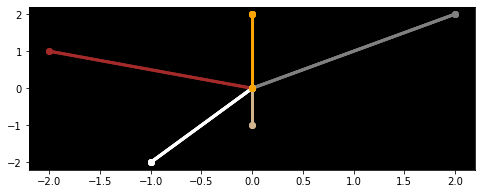

In [12]:
plt.figure(figsize=(8,3))
plt.rcParams['axes.facecolor'] = 'black'
for i in range(len(data)):
    plt.plot([0,data['Color_0'][i]], [0,data['Color_1'][i]], 
    color=data['Color'][i], marker='o',linestyle='-',lw=3)
plt.show()
